<a href="https://colab.research.google.com/github/abhinavm24/EIP/blob/master/week3/assignment/Assignment_6-solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 4s 0us/step


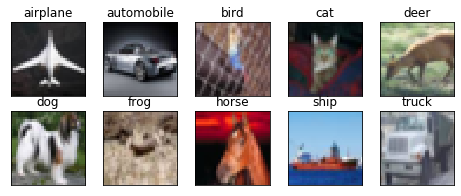

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [7]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)       

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':





Epoch 1/50





390/390 [==============================] - 14s 37ms/step - loss: 1.8924 - acc: 0.2782 - val_loss: 1.4211 - val_acc: 0.4667
Epoch 2/50
390/390 [==============================] - 7s 17ms/step - loss: 1.3477 - acc: 0.5118 - val_loss: 1.1467 - val_acc: 0.5922
Epoch 3/50
390/390 [==============================] - 7s 17ms/step - loss: 1.1067 - acc: 0.6100 - val_loss: 0.9843 - val_acc: 0.6511
Epoch 4/50
390/390 [==============================] - 7s 17ms/step - loss: 0.9763 - acc: 0.6598 - val_loss: 0.8339 - val_acc: 0.7106
Epoch 5/50
390/390 [==============================] - 7s 17ms/step - loss: 0.8785 - acc: 0.6953 - val_loss: 0.7653 - val_acc: 0.7329
Epoch 6/50
390/390 [==============================] - 7s 17ms/step - loss: 0.8156 - acc: 0.7195 - val_loss: 0.7284 - val_acc: 0.7517
Epoch 7/50
390/390 [==============================] - 7s 17ms/step - loss: 0.7525 - acc: 0.7434 - val_loss: 0.7067 - val_acc: 0.7555
Epoch 8/50
390/390 [==============================] - 7s 17m

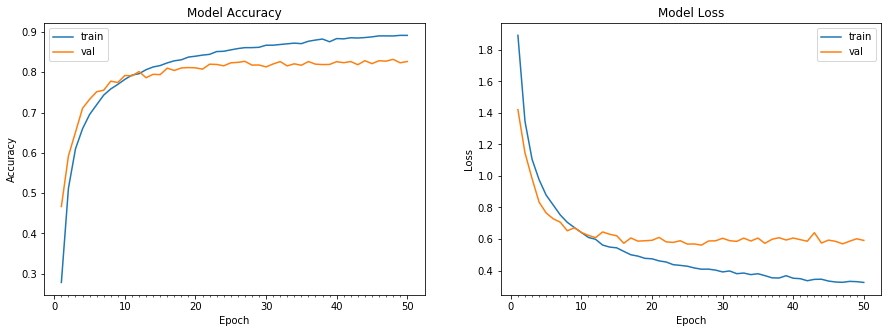

Accuracy on test data is: 82.68


In [9]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

# Assignment

In [0]:
from keras.layers.convolutional import SeparableConv2D
from keras.layers import GlobalAveragePooling2D
from keras import regularizers

In [0]:
weight_decay = 5e-4

In [31]:
# Define the model
model = Sequential()
model.add(SeparableConv2D(32, (3, 3), kernel_regularizer=regularizers.l2(weight_decay), padding='valid', use_bias=False, input_shape=(32,32,3))) #30, 3
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConv2D(64, (3, 3), kernel_regularizer=regularizers.l2(weight_decay), padding='valid', use_bias=False)) #28, 5
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConv2D(128, (3, 3), kernel_regularizer=regularizers.l2(weight_decay), padding='valid', use_bias=False)) #26, 7
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2))) #13, 8
model.add(Dropout(0.1))
 
model.add(SeparableConv2D(32, (1, 1), kernel_regularizer=regularizers.l2(weight_decay), padding='valid', use_bias=False)) #13, 8
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConv2D(128, (3, 3), kernel_regularizer=regularizers.l2(weight_decay), padding='valid', use_bias=False)) #11, 12
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConv2D(256, (3, 3),kernel_regularizer=regularizers.l2(weight_decay), padding='valid', use_bias=False)) #9, 16
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2))) #4, 18
model.add(Dropout(0.1))
 
model.add(SeparableConv2D(64, (1, 1), kernel_regularizer=regularizers.l2(weight_decay), padding='valid', use_bias=False)) #4, 18
model.add(Activation('relu'))

model.add(SeparableConv2D(10, (1, 1))) #4, 18
model.add(BatchNormalization())
model.add(SeparableConv2D(10, (4, 4))) #1, 18
model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_63 (Separab (None, 30, 30, 32)        123       
_________________________________________________________________
activation_64 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
batch_normalization_50 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
dropout_55 (Dropout)         (None, 30, 30, 32)        0         
_________________________________________________________________
separable_conv2d_64 (Separab (None, 28, 28, 64)        2336      
_________________________________________________________________
activation_65 (Activation)   (None, 28, 28, 64)        0         
_________________________________________________________________
batch_normalization_51 (Batc (None, 28, 28, 64)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  


Epoch 1/50
390/390 [==============================] - 30s 76ms/step - loss: 1.6834 - acc: 0.3731 - val_loss: 1.4593 - val_acc: 0.4960
Epoch 2/50
390/390 [==============================] - 26s 67ms/step - loss: 1.2809 - acc: 0.5413 - val_loss: 1.1782 - val_acc: 0.5730
Epoch 3/50
390/390 [==============================] - 26s 67ms/step - loss: 1.1509 - acc: 0.5901 - val_loss: 1.0394 - val_acc: 0.6258
Epoch 4/50
390/390 [==============================] - 27s 68ms/step - loss: 1.0663 - acc: 0.6205 - val_loss: 0.9857 - val_acc: 0.6585
Epoch 5/50
390/390 [==============================] - 27s 68ms/step - loss: 1.0067 - acc: 0.6462 - val_loss: 0.9396 - val_acc: 0.6684
Epoch 6/50
390/390 [==============================] - 27s 69ms/step - loss: 0.9582 - acc: 0.6604 - val_loss: 0.8686 - val_acc: 0.6900
Epoch 7/50
390/390 [==============================] - 26s 67ms/step - loss: 0.9175 - acc: 0.6751 - val_loss: 0.8725 - val_acc: 0.6963
Epoch 8/50
390/390 [==============================] - 26s 68ms

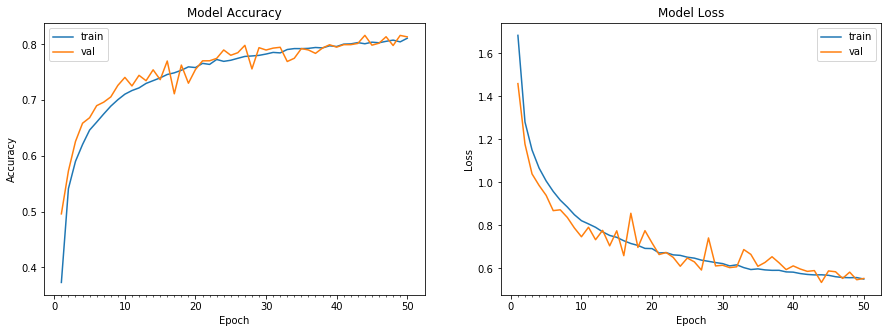

Accuracy on test data is: 81.34


In [25]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0,
                             width_shift_range=0.1,
                             height_shift_range=0.1, 
                             horizontal_flip=True)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

# More channels

In [41]:
# Define the model
model = Sequential()
model.add(SeparableConv2D(48, (3, 3), kernel_regularizer=regularizers.l2(weight_decay), padding='valid', use_bias=False, input_shape=(32,32,3))) #30, 3
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConv2D(96, (3, 3), kernel_regularizer=regularizers.l2(weight_decay), padding='valid', use_bias=False)) #28, 5
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConv2D(192, (3, 3), kernel_regularizer=regularizers.l2(weight_decay), padding='valid', use_bias=False)) #26, 7
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2))) #13, 8
model.add(Dropout(0.1))
 
model.add(SeparableConv2D(48, (1, 1), kernel_regularizer=regularizers.l2(weight_decay), padding='valid', use_bias=False)) #13, 8
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConv2D(96, (3, 3), kernel_regularizer=regularizers.l2(weight_decay), padding='valid', use_bias=False)) #11, 12
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConv2D(192, (3, 3),kernel_regularizer=regularizers.l2(weight_decay), padding='valid', use_bias=False)) #9, 16
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2))) #4, 18
model.add(Dropout(0.1))
 
model.add(SeparableConv2D(64, (1, 1), kernel_regularizer=regularizers.l2(weight_decay), padding='valid', use_bias=False)) #4, 18
model.add(Activation('relu'))

model.add(SeparableConv2D(10, (1, 1))) #4, 18
model.add(BatchNormalization())
model.add(SeparableConv2D(10, (4, 4))) #1, 18
model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_117 (Separa (None, 30, 30, 48)        171       
_________________________________________________________________
activation_112 (Activation)  (None, 30, 30, 48)        0         
_________________________________________________________________
batch_normalization_92 (Batc (None, 30, 30, 48)        192       
_________________________________________________________________
dropout_97 (Dropout)         (None, 30, 30, 48)        0         
_________________________________________________________________
separable_conv2d_118 (Separa (None, 28, 28, 96)        5040      
_________________________________________________________________
activation_113 (Activation)  (None, 28, 28, 96)        0         
_________________________________________________________________
batch_normalization_93 (Batc (None, 28, 28, 96)      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`


Epoch 1/50
390/390 [==============================] - 33s 85ms/step - loss: 1.7011 - acc: 0.3735 - val_loss: 1.4691 - val_acc: 0.4783
Epoch 2/50
390/390 [==============================] - 28s 71ms/step - loss: 1.2971 - acc: 0.5301 - val_loss: 1.2087 - val_acc: 0.5686
Epoch 3/50
390/390 [==============================] - 28s 72ms/step - loss: 1.1332 - acc: 0.5937 - val_loss: 1.0774 - val_acc: 0.6165
Epoch 4/50
390/390 [==============================] - 28s 72ms/step - loss: 1.0465 - acc: 0.6268 - val_loss: 1.0217 - val_acc: 0.6517
Epoch 5/50
390/390 [==============================] - 28s 72ms/step - loss: 0.9908 - acc: 0.6487 - val_loss: 1.0046 - val_acc: 0.6567
Epoch 6/50
390/390 [==============================] - 28s 71ms/step - loss: 0.9403 - acc: 0.6677 - val_loss: 0.8439 - val_acc: 0.7025
Epoch 7/50
390/390 [==============================] - 28s 71ms/step - loss: 0.9103 - acc: 0.6793 - val_loss: 0.9084 - val_acc: 0.6851
Epoch 8/50
390/390 [==============================] - 28s 71ms

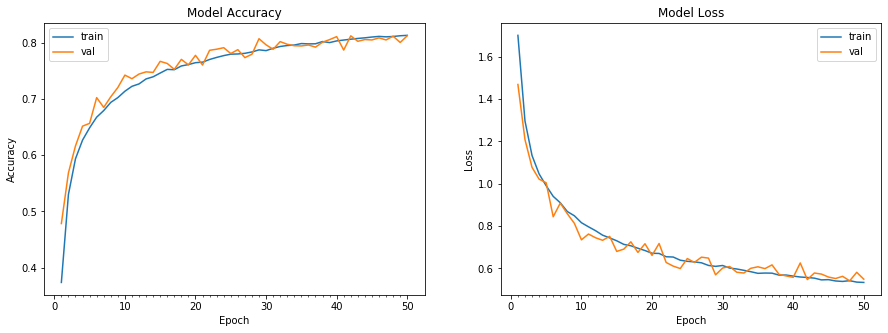

Accuracy on test data is: 81.26


In [37]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

# bigger batch

In [43]:
# Define the model
model = Sequential()
model.add(SeparableConv2D(48, (3, 3), kernel_regularizer=regularizers.l2(weight_decay), padding='valid', use_bias=False, input_shape=(32,32,3))) #30, 3
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConv2D(96, (3, 3), kernel_regularizer=regularizers.l2(weight_decay), padding='valid', use_bias=False)) #28, 5
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConv2D(192, (3, 3), kernel_regularizer=regularizers.l2(weight_decay), padding='valid', use_bias=False)) #26, 7
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2))) #13, 8
model.add(Dropout(0.1))
 
model.add(SeparableConv2D(48, (1, 1), kernel_regularizer=regularizers.l2(weight_decay), padding='valid', use_bias=False)) #13, 8
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConv2D(96, (3, 3), kernel_regularizer=regularizers.l2(weight_decay), padding='valid', use_bias=False)) #11, 12
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConv2D(192, (3, 3),kernel_regularizer=regularizers.l2(weight_decay), padding='valid', use_bias=False)) #9, 16
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2))) #4, 18
model.add(Dropout(0.1))
 
model.add(SeparableConv2D(64, (1, 1), kernel_regularizer=regularizers.l2(weight_decay), padding='valid', use_bias=False)) #4, 18
model.add(Activation('relu'))

model.add(SeparableConv2D(10, (1, 1))) #4, 18
model.add(BatchNormalization())
model.add(SeparableConv2D(10, (4, 4))) #1, 18
model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_126 (Separa (None, 30, 30, 48)        171       
_________________________________________________________________
activation_120 (Activation)  (None, 30, 30, 48)        0         
_________________________________________________________________
batch_normalization_99 (Batc (None, 30, 30, 48)        192       
_________________________________________________________________
dropout_104 (Dropout)        (None, 30, 30, 48)        0         
_________________________________________________________________
separable_conv2d_127 (Separa (None, 28, 28, 96)        5040      
_________________________________________________________________
activation_121 (Activation)  (None, 28, 28, 96)        0         
_________________________________________________________________
batch_normalization_100 (Bat (None, 28, 28, 96)      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=195, epochs=50)`


Epoch 1/50
195/195 [==============================] - 32s 162ms/step - loss: 1.8828 - acc: 0.3026 - val_loss: 1.9009 - val_acc: 0.3791
Epoch 2/50
195/195 [==============================] - 26s 132ms/step - loss: 1.3858 - acc: 0.4967 - val_loss: 1.4303 - val_acc: 0.5139
Epoch 3/50
195/195 [==============================] - 26s 131ms/step - loss: 1.2262 - acc: 0.5582 - val_loss: 1.2286 - val_acc: 0.5748
Epoch 4/50
195/195 [==============================] - 26s 134ms/step - loss: 1.1320 - acc: 0.5933 - val_loss: 1.0805 - val_acc: 0.6202
Epoch 5/50
195/195 [==============================] - 26s 133ms/step - loss: 1.0602 - acc: 0.6206 - val_loss: 1.0551 - val_acc: 0.6330
Epoch 6/50
195/195 [==============================] - 26s 133ms/step - loss: 1.0054 - acc: 0.6421 - val_loss: 1.0196 - val_acc: 0.6457
Epoch 7/50
195/195 [==============================] - 26s 134ms/step - loss: 0.9555 - acc: 0.6614 - val_loss: 0.9549 - val_acc: 0.6667
Epoch 8/50
195/195 [==============================] - 2

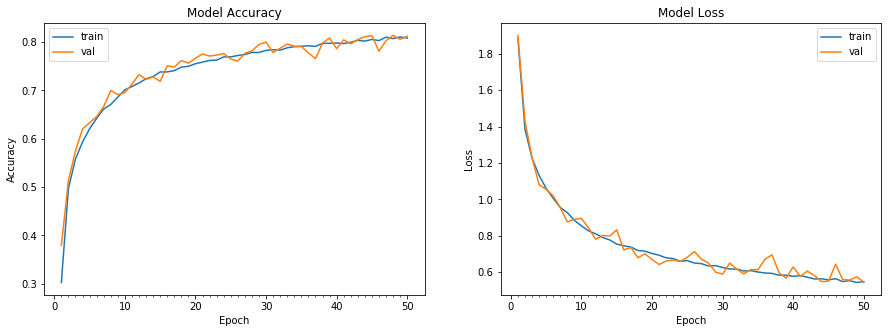

Accuracy on test data is: 81.20


In [44]:
from keras.preprocessing.image import ImageDataGenerator

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

datagen = ImageDataGenerator(zoom_range=0.0,
                             width_shift_range=0.1,
                             height_shift_range=0.1, 
                             horizontal_flip=True)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 256),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

# Add zoom

In [0]:
# Define the model
model = Sequential()
model.add(SeparableConv2D(48, (3, 3), kernel_regularizer=regularizers.l2(weight_decay), padding='valid', use_bias=False, input_shape=(32,32,3))) #30, 3
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConv2D(96, (3, 3), kernel_regularizer=regularizers.l2(weight_decay), padding='valid', use_bias=False)) #28, 5
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConv2D(192, (3, 3), kernel_regularizer=regularizers.l2(weight_decay), padding='valid', use_bias=False)) #26, 7
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2))) #13, 8
model.add(Dropout(0.1))
 
model.add(SeparableConv2D(48, (1, 1), kernel_regularizer=regularizers.l2(weight_decay), padding='valid', use_bias=False)) #13, 8
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConv2D(96, (3, 3), kernel_regularizer=regularizers.l2(weight_decay), padding='valid', use_bias=False)) #11, 12
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConv2D(192, (3, 3),kernel_regularizer=regularizers.l2(weight_decay), padding='valid', use_bias=False)) #9, 16
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2))) #4, 18
model.add(Dropout(0.1))
 
model.add(SeparableConv2D(64, (1, 1), kernel_regularizer=regularizers.l2(weight_decay), padding='valid', use_bias=False)) #4, 18
model.add(Activation('relu'))

model.add(SeparableConv2D(10, (1, 1))) #4, 18
model.add(BatchNormalization())
model.add(SeparableConv2D(10, (4, 4))) #1, 18
model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=195, epochs=50)`


Epoch 1/50
195/195 [==============================] - 32s 164ms/step - loss: 1.8674 - acc: 0.3044 - val_loss: 3.4250 - val_acc: 0.2795
Epoch 2/50
195/195 [==============================] - 26s 134ms/step - loss: 1.3987 - acc: 0.4893 - val_loss: 1.5078 - val_acc: 0.4967
Epoch 3/50
195/195 [==============================] - 26s 135ms/step - loss: 1.2298 - acc: 0.5561 - val_loss: 1.2809 - val_acc: 0.5558
Epoch 4/50
195/195 [==============================] - 26s 135ms/step - loss: 1.1247 - acc: 0.5975 - val_loss: 1.1027 - val_acc: 0.6122
Epoch 5/50
195/195 [==============================] - 26s 135ms/step - loss: 1.0546 - acc: 0.6235 - val_loss: 1.1174 - val_acc: 0.6094
Epoch 6/50
195/195 [==============================] - 26s 134ms/step - loss: 0.9952 - acc: 0.6443 - val_loss: 0.9544 - val_acc: 0.6596
Epoch 7/50
195/195 [==============================] - 26s 134ms/step - loss: 0.9438 - acc: 0.6662 - val_loss: 0.8924 - val_acc: 0.6837
Epoch 8/50
195/195 [==============================] - 2

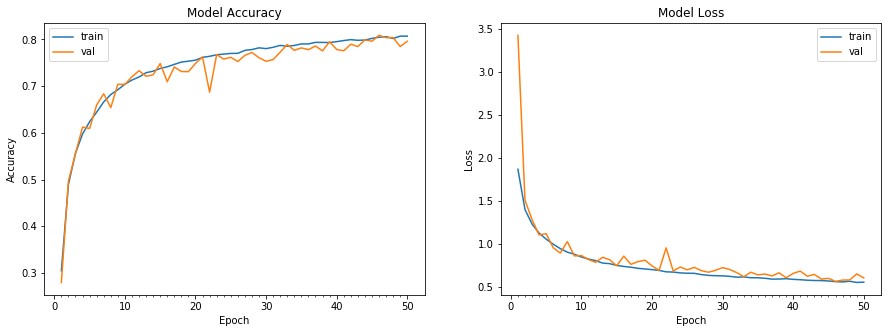

Accuracy on test data is: 79.61


In [42]:
from keras.preprocessing.image import ImageDataGenerator

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

datagen = ImageDataGenerator(zoom_range=0.1,
                             width_shift_range=0.1,
                             height_shift_range=0.1, 
                             horizontal_flip=True)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 256),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

# Add rotation

In [45]:
# Define the model
model = Sequential()
model.add(SeparableConv2D(48, (3, 3), kernel_regularizer=regularizers.l2(weight_decay), padding='valid', use_bias=False, input_shape=(32,32,3))) #30, 3
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConv2D(96, (3, 3), kernel_regularizer=regularizers.l2(weight_decay), padding='valid', use_bias=False)) #28, 5
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConv2D(192, (3, 3), kernel_regularizer=regularizers.l2(weight_decay), padding='valid', use_bias=False)) #26, 7
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2))) #13, 8
model.add(Dropout(0.1))
 
model.add(SeparableConv2D(48, (1, 1), kernel_regularizer=regularizers.l2(weight_decay), padding='valid', use_bias=False)) #13, 8
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConv2D(96, (3, 3), kernel_regularizer=regularizers.l2(weight_decay), padding='valid', use_bias=False)) #11, 12
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConv2D(192, (3, 3),kernel_regularizer=regularizers.l2(weight_decay), padding='valid', use_bias=False)) #9, 16
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2))) #4, 18
model.add(Dropout(0.1))
 
model.add(SeparableConv2D(64, (1, 1), kernel_regularizer=regularizers.l2(weight_decay), padding='valid', use_bias=False)) #4, 18
model.add(Activation('relu'))

model.add(SeparableConv2D(10, (1, 1))) #4, 18
model.add(BatchNormalization())
model.add(SeparableConv2D(10, (4, 4))) #1, 18
model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_135 (Separa (None, 30, 30, 48)        171       
_________________________________________________________________
activation_128 (Activation)  (None, 30, 30, 48)        0         
_________________________________________________________________
batch_normalization_106 (Bat (None, 30, 30, 48)        192       
_________________________________________________________________
dropout_111 (Dropout)        (None, 30, 30, 48)        0         
_________________________________________________________________
separable_conv2d_136 (Separa (None, 28, 28, 96)        5040      
_________________________________________________________________
activation_129 (Activation)  (None, 28, 28, 96)        0         
_________________________________________________________________
batch_normalization_107 (Bat (None, 28, 28, 96)      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=195, epochs=50)`


Epoch 1/50
195/195 [==============================] - 34s 175ms/step - loss: 1.9031 - acc: 0.2959 - val_loss: 1.8163 - val_acc: 0.3927
Epoch 2/50
195/195 [==============================] - 28s 142ms/step - loss: 1.4734 - acc: 0.4630 - val_loss: 1.4487 - val_acc: 0.4895
Epoch 3/50
195/195 [==============================] - 28s 143ms/step - loss: 1.3016 - acc: 0.5321 - val_loss: 1.2451 - val_acc: 0.5676
Epoch 4/50
195/195 [==============================] - 28s 144ms/step - loss: 1.1961 - acc: 0.5736 - val_loss: 1.0939 - val_acc: 0.6139
Epoch 5/50
195/195 [==============================] - 28s 143ms/step - loss: 1.1245 - acc: 0.6006 - val_loss: 1.0354 - val_acc: 0.6399
Epoch 6/50
195/195 [==============================] - 28s 141ms/step - loss: 1.0655 - acc: 0.6202 - val_loss: 1.0424 - val_acc: 0.6461
Epoch 7/50
195/195 [==============================] - 28s 142ms/step - loss: 1.0213 - acc: 0.6362 - val_loss: 0.9867 - val_acc: 0.6587
Epoch 8/50
195/195 [==============================] - 2

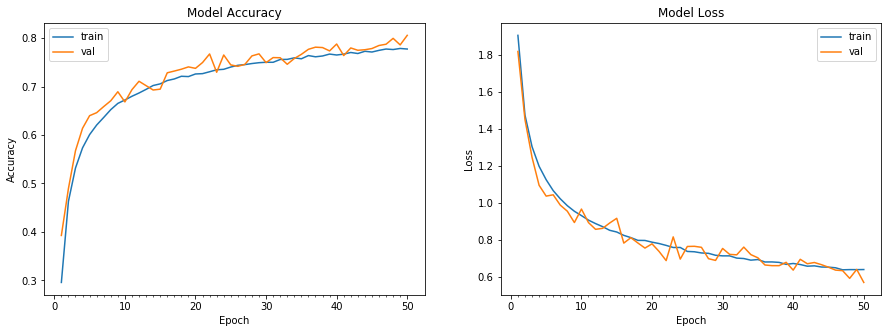

Accuracy on test data is: 80.57


In [46]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.1,
                             rotation_range=20,
                             width_shift_range=0.1,
                             height_shift_range=0.1, 
                             horizontal_flip=True)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 256),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

# Use learning rate scheduler

In [47]:
# Define the model
model = Sequential()
model.add(SeparableConv2D(48, (3, 3), kernel_regularizer=regularizers.l2(weight_decay), padding='valid', use_bias=False, input_shape=(32,32,3))) #30, 3
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConv2D(96, (3, 3), kernel_regularizer=regularizers.l2(weight_decay), padding='valid', use_bias=False)) #28, 5
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConv2D(192, (3, 3), kernel_regularizer=regularizers.l2(weight_decay), padding='valid', use_bias=False)) #26, 7
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2))) #13, 8
model.add(Dropout(0.1))
 
model.add(SeparableConv2D(48, (1, 1), kernel_regularizer=regularizers.l2(weight_decay), padding='valid', use_bias=False)) #13, 8
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConv2D(96, (3, 3), kernel_regularizer=regularizers.l2(weight_decay), padding='valid', use_bias=False)) #11, 12
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConv2D(192, (3, 3),kernel_regularizer=regularizers.l2(weight_decay), padding='valid', use_bias=False)) #9, 16
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2))) #4, 18
model.add(Dropout(0.1))
 
model.add(SeparableConv2D(64, (1, 1), kernel_regularizer=regularizers.l2(weight_decay), padding='valid', use_bias=False)) #4, 18
model.add(Activation('relu'))

model.add(SeparableConv2D(10, (1, 1))) #4, 18
model.add(BatchNormalization())
model.add(SeparableConv2D(10, (4, 4))) #1, 18
model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_144 (Separa (None, 30, 30, 48)        171       
_________________________________________________________________
activation_136 (Activation)  (None, 30, 30, 48)        0         
_________________________________________________________________
batch_normalization_113 (Bat (None, 30, 30, 48)        192       
_________________________________________________________________
dropout_118 (Dropout)        (None, 30, 30, 48)        0         
_________________________________________________________________
separable_conv2d_145 (Separa (None, 28, 28, 96)        5040      
_________________________________________________________________
activation_137 (Activation)  (None, 28, 28, 96)        0         
_________________________________________________________________
batch_normalization_114 (Bat (None, 28, 28, 96)      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., verbose=1, steps_per_epoch=195, epochs=50)`


Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.005.
195/195 [==============================] - 38s 193ms/step - loss: 1.5793 - acc: 0.4240 - val_loss: 3.8361 - val_acc: 0.3597
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.0037907506.
195/195 [==============================] - 28s 144ms/step - loss: 1.2350 - acc: 0.5557 - val_loss: 1.4751 - val_acc: 0.5567
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.0030525031.
195/195 [==============================] - 28s 144ms/step - loss: 1.1034 - acc: 0.6063 - val_loss: 1.1089 - val_acc: 0.6200
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.002554931.
195/195 [==============================] - 28s 143ms/step - loss: 1.0274 - acc: 0.6344 - val_loss: 1.0670 - val_acc: 0.6375
Epoch 5/50

Epoch 00005: LearningRateScheduler setting learning rate to 0.0021968366.
195/195 [==============================] - 28s 143ms/step - loss: 0.9686 - acc: 0.

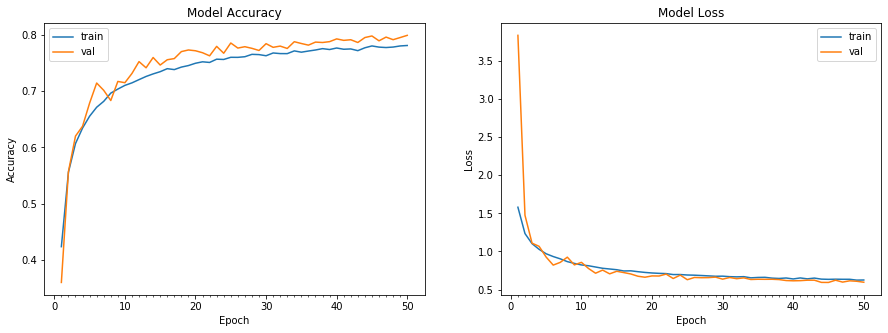

Accuracy on test data is: 79.92


In [48]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.005 * 1/(1 + 0.319 * epoch), 10)

datagen = ImageDataGenerator(zoom_range=0.1,
                             rotation_range=20,
                             width_shift_range=0.1,
                             height_shift_range=0.1, 
                             horizontal_flip=True)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 256),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels),callbacks=[LearningRateScheduler(scheduler, verbose=1)], verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))



# final run

In [49]:
# Define the model
model = Sequential()
model.add(SeparableConv2D(32, (3, 3), kernel_regularizer=regularizers.l2(weight_decay), padding='valid', use_bias=False, input_shape=(32,32,3))) #30, 3
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConv2D(64, (3, 3), kernel_regularizer=regularizers.l2(weight_decay), padding='valid', use_bias=False)) #28, 5
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConv2D(128, (3, 3), kernel_regularizer=regularizers.l2(weight_decay), padding='valid', use_bias=False)) #26, 7
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2))) #13, 8
model.add(Dropout(0.1))
 
model.add(SeparableConv2D(32, (1, 1), kernel_regularizer=regularizers.l2(weight_decay), padding='valid', use_bias=False)) #13, 8
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConv2D(128, (3, 3), kernel_regularizer=regularizers.l2(weight_decay), padding='valid', use_bias=False)) #11, 12
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConv2D(256, (3, 3),kernel_regularizer=regularizers.l2(weight_decay), padding='valid', use_bias=False)) #9, 16
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2))) #4, 18
model.add(Dropout(0.1))
 
model.add(SeparableConv2D(64, (1, 1), kernel_regularizer=regularizers.l2(weight_decay), padding='valid', use_bias=False)) #4, 18
model.add(Activation('relu'))

model.add(SeparableConv2D(10, (1, 1))) #4, 18
model.add(BatchNormalization())
model.add(SeparableConv2D(10, (4, 4))) #1, 18
model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_153 (Separa (None, 30, 30, 32)        123       
_________________________________________________________________
activation_144 (Activation)  (None, 30, 30, 32)        0         
_________________________________________________________________
batch_normalization_120 (Bat (None, 30, 30, 32)        128       
_________________________________________________________________
dropout_125 (Dropout)        (None, 30, 30, 32)        0         
_________________________________________________________________
separable_conv2d_154 (Separa (None, 28, 28, 64)        2336      
_________________________________________________________________
activation_145 (Activation)  (None, 28, 28, 64)        0         
_________________________________________________________________
batch_normalization_121 (Bat (None, 28, 28, 64)      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., verbose=1, steps_per_epoch=390, epochs=50)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator 

Epoch 1/50
Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.005.

Epoch 00001: LearningRateScheduler setting learning rate to 0.005.
390/390 [==============================] - 40s 102ms/step - loss: 1.6139 - acc: 0.4033 - val_loss: 2.7876 - val_acc: 0.3697
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.0037907506.
  1/390 [..............................] - ETA: 21s - loss: 1.5437 - acc: 0.4453Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.0037907506.
390/390 [==============================] - 29s 74ms/step - loss: 1.2928 - acc: 0.5341 - val_loss: 1.3219 - val_acc: 0.5521
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.0030525031.
  1/390 [..............................] - ETA: 23s - loss: 1.1402 - acc: 0.5859Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.0030525031.
390/390 [==============================] - 29s 74ms/step - loss: 1.1511 - acc: 0.5870 - val

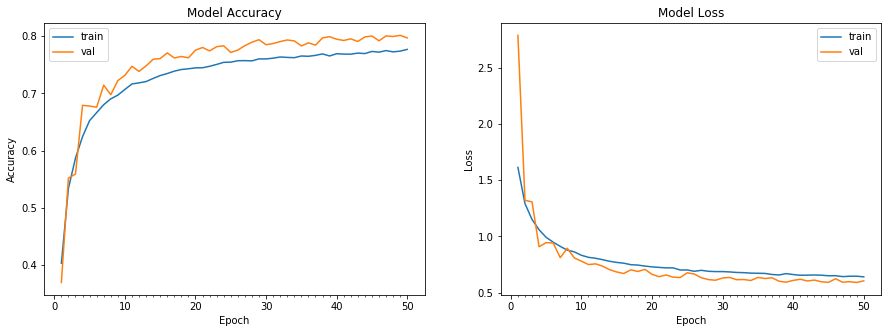

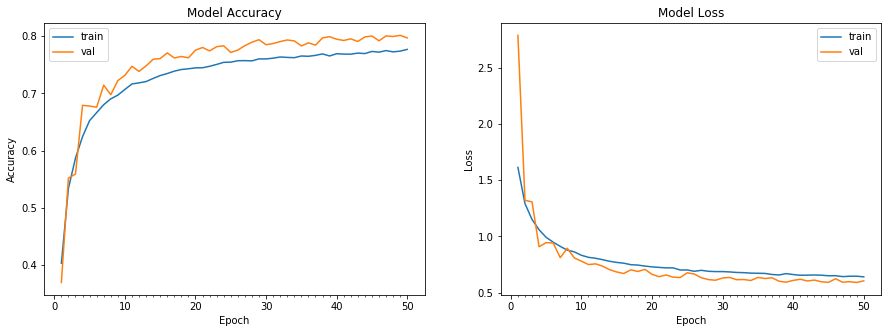

Accuracy on test data is: 79.72
Accuracy on test data is: 79.72


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., verbose=1, steps_per_epoch=390, epochs=50)`


Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.005.
390/390 [==============================] - 40s 102ms/step - loss: 1.6139 - acc: 0.4033 - val_loss: 2.7876 - val_acc: 0.3697
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.0037907506.
390/390 [==============================] - 29s 74ms/step - loss: 1.2928 - acc: 0.5341 - val_loss: 1.3219 - val_acc: 0.5521
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.0030525031.
390/390 [==============================] - 29s 74ms/step - loss: 1.1511 - acc: 0.5870 - val_loss: 1.3072 - val_acc: 0.5592
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.002554931.
390/390 [==============================] - 29s 74ms/step - loss: 1.0596 - acc: 0.6245 - val_loss: 0.9088 - val_acc: 0.6793
Epoch 5/50

Epoch 00005: LearningRateScheduler setting learning rate to 0.0021968366.
390/390 [==============================] - 28s 72ms/step - loss: 0.9922 - acc: 0.6527

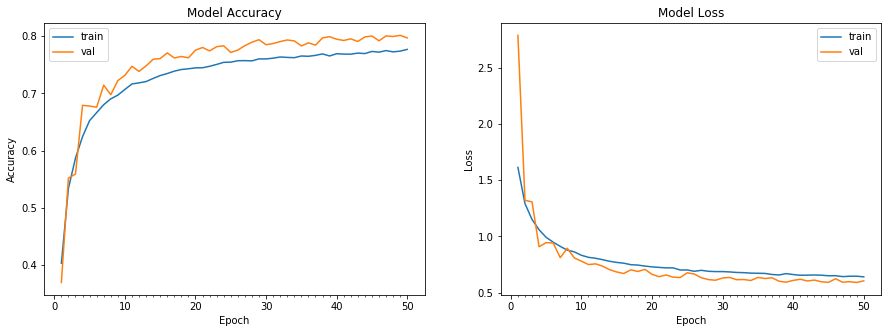

Accuracy on test data is: 79.72


In [50]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.005 * 1/(1 + 0.319 * epoch), 10)

datagen = ImageDataGenerator(zoom_range=0.1,
                             rotation_range=20,
                             width_shift_range=0.1,
                             height_shift_range=0.1, 
                             horizontal_flip=True)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels),callbacks=[LearningRateScheduler(scheduler, verbose=1)], verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))



# Model - 2

In [0]:
# Define the model
model = Sequential()
model.add(SeparableConv2D(48, (3, 3), kernel_regularizer=regularizers.l2(weight_decay), padding='same', use_bias=False, input_shape=(32,32,3))) #32, 3
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConv2D(96, (3, 3), kernel_regularizer=regularizers.l2(weight_decay), padding='valid', use_bias=False)) #30, 5
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2))) #15, 6
model.add(Dropout(0.1))
 
model.add(SeparableConv2D(192, (3, 3), kernel_regularizer=regularizers.l2(weight_decay), padding='valid', use_bias=False)) #15, 10
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConv2D(64, (3, 3), kernel_regularizer=regularizers.l2(weight_decay), padding='valid', use_bias=False)) #13, 14
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2))) #6, 16
model.add(Dropout(0.1))
 
model.add(SeparableConv2D(32, (3, 3), kernel_regularizer=regularizers.l2(weight_decay), padding='valid', use_bias=False)) #6, 24
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConv2D(64, (3, 3), kernel_regularizer=regularizers.l2(weight_decay), padding='valid', use_bias=False)) #6, 22
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConv2D(32, (3, 3), kernel_regularizer=regularizers.l2(weight_decay), padding='valid', use_bias=False)) #4, 26
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConv2D(64, (3, 3), kernel_regularizer=regularizers.l2(weight_decay), padding='valid', use_bias=False)) #10, 30
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConv2D(10, (1, 1))) #4, 18
model.add(BatchNormalization())
model.add(SeparableConv2D(10, (4, 4))) #1, 18
model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.summary()